# &#128060; Código Parcial Métodos Numéricos &#128060; 

## Ejercicio 1 ✍


Se sospecha que las altas cantidades de tanino en las hojas maduras de roble inhiben el crecimiento de las larvas de la polilla de invierno (Operophtera bromata L., Geometridae) que dañan extensamente estos árboles en ciertos años. La siguiente tabla lista el peso promedio de dos muestras de larvas en momentos durante los primeros 28 días después del nacimiento. La primera muestra fue criada con hojas jóvenes de roble, mientras que la segunda muestra fue criada con hojas maduras del mismo árbol. Utilice la interpolación de Lagrange y Newton para aproximar la curva de peso promedio para cada muestra. Realice un gráfico para cada interpolación.

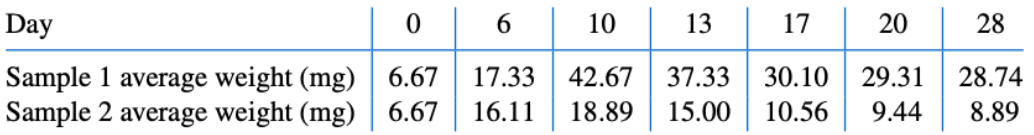

### Interpolinomio de Lagrange 🎃

Los valores de x son [ 0  6 10 13 17 20 28]
Los valores de f(x) [ 6.67 16.11 18.89 15.   10.56  9.44  8.89]

Polinomio de Lagrange expresado:
-2.83036768426379e-5*x*(x - 28)*(x - 20)*(x - 17)*(x - 13)*(x - 10) + 0.000124933862433862*x*(x - 28)*(x - 20)*(x - 17)*(x - 13)*(x - 6) - 0.000130821559392988*x*(x - 28)*(x - 20)*(x - 17)*(x - 10)*(x - 6) + 6.11153552330023e-5*x*(x - 28)*(x - 20)*(x - 13)*(x - 10)*(x - 6) - 2.00680272108844e-5*x*(x - 28)*(x - 17)*(x - 13)*(x - 10)*(x - 6) + 6.07399755127028e-7*x*(x - 20)*(x - 17)*(x - 13)*(x - 10)*(x - 6) + 8.98243912949795e-7*(x - 28)*(x - 20)*(x - 17)*(x - 13)*(x - 10)*(x - 6)

El Polinomio de Lagrange es:

8.36159788843139e-6*x**6 - 0.000752546222451686*x**5 + 0.0258412834421931*x**4 - 0.413798650664972*x**3 + 2.91280910177557*x**2 - 5.67820695777782*x + 6.67


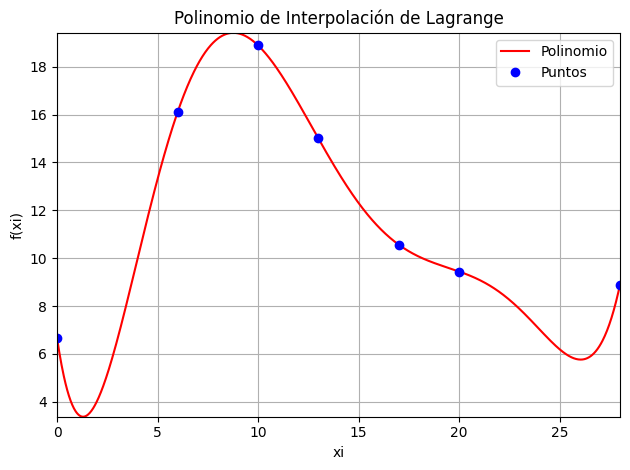

In [1]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Interpolación de Lagrange ###
#------------------------------------------------------------------------------------------

x = sp.Symbol('x')

def InterpolacionLagrange(x_i, f_i):

  n = len(x_i)
  x = sp.Symbol('x')
  polinomio = 0
  divisorL = np.zeros(n, dtype = float)

  for i in range(0, n, 1):
    numerador = 1
    denominador = 1

    for j in range(0, n, 1):
      if (j != i):
        numerador = numerador*(x - x_i[j])
        denominador = denominador*(x_i[i] - x_i[j])

    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*f_i[i]
    divisorL[i] = denominador
  return(polinomio)


#------------------------------------------------------------------------------------------
### Llamando la función ###
#------------------------------------------------------------------------------------------

#Datos

xi = np.array([0, 6, 10, 13, 17, 20, 28])
fi = np.array([6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89])
#fi = np.array([6.67, 17.33, 42.67, 37.33, 30.10, 29.31, 28.74])

Pol = InterpolacionLagrange(xi, fi)

#Simplificar

polisimple = InterpolacionLagrange(xi, fi).expand()

# para evaluación numérica
px = sp.lambdify(x, polisimple)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

print('Los valores de x son', xi)

print('Los valores de f(x)', fi)

print()

print("Polinomio de Lagrange expresado:")

print(Pol)

print()

print("El Polinomio de Lagrange es:")

print()

print(polisimple)

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Polinomio de Interpolación de Lagrange")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

a = np.min(xi)
b = np.max(xi)

pxi = np.linspace(a, b, 1000)
pfi = px(pxi)

## Grafica de la Función

ax1.plot(pxi, pfi, "r", label = "Polinomio")      #Polinomio 
ax1.plot(xi, fi, 'o', color = 'b', label = "Puntos")   #Puntos

v = [np.min(xi), np.max(xi), np.min(pfi), np.max(pfi)]   #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("xi")
plt.ylabel("f(xi)")
plt.title("Polinomio de Interpolación de Lagrange")
plt.grid()
plt.axis(v)
plt.legend(loc=1)

plt.tight_layout()
plt.show()

### Polinomio de Newton 👻

El polinomio de Interpolación de Newton para la muestra 2 es:
8.36159788843136e-6*x*(x - 20)*(x - 17)*(x - 13)*(x - 10)*(x - 6) - 0.000200680761815216*x*(x - 17)*(x - 13)*(x - 10)*(x - 6) + 0.00255412234824*x*(x - 13)*(x - 10)*(x - 6) - 0.0151300366300366*x*(x - 10)*(x - 6) - 0.0878333333333333*x*(x - 6) + 1.57333333333333*x + 6.67

Simplificando:
8.36159788843136e-6*x**6 - 0.000752546222451685*x**5 + 0.025841283442193*x**4 - 0.413798650664971*x**3 + 2.91280910177556*x**2 - 5.67820695777782*x + 6.67


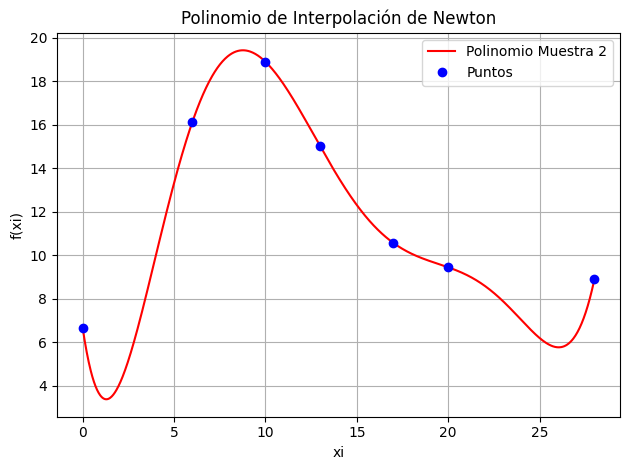

In [11]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Polinomio de Newton ###
#------------------------------------------------------------------------------------------

x = sp.Symbol('x')

def InterpolacionNewton(x_i, f_i):

    # Diferencias Divididas 
    titulo = ['i   ','xi  ','fi  ']
    n = len(x_i)
    ki = np.arange(0,n,1)
    tabla = np.concatenate(([ki],[x_i],[f_i]),axis=0)
    tabla = np.transpose(tabla)

    # diferencias divididas vacia
    dfinita = np.zeros(shape=(n,n),dtype=float)
    tabla = np.concatenate((tabla,dfinita), axis=1)

    # Calcula tabla, inicia en columna 3
    [n,m] = np.shape(tabla)
    diagonal = n-1
    j = 3

    while (j < m):
        # Añade título para cada columna
        titulo.append('F['+str(j-2)+']')

        # cada fila de columna
        i = 0
        paso = j-2 # inicia en 1
        while (i < diagonal):
            denominador = (x_i[i+paso]-x_i[i])
            numerador = tabla[i+1,j-1]-tabla[i,j-1]
            tabla[i,j] = numerador/denominador
            i = i+1
        diagonal = diagonal - 1
        j = j+1

    # POLINOMIO con diferencias Divididas
    # caso: puntos equidistantes en eje x
    dDividida = tabla[0,3:]
    n = len(dfinita)

    # expresión del polinomio con Sympy
    x = sp.Symbol('x')
    polinomio = f_i[0]
    for j in range(1,n,1):
        factor = dDividida[j-1]
        termino = 1
        for k in range(0,j,1):
            termino = termino*(x-x_i[k])
        polinomio = polinomio + termino*factor
    return(polinomio)

#------------------------------------------------------------------------------------------
### Llamando la función ###
#------------------------------------------------------------------------------------------
 
#Datos
xi = np.array([0, 6, 10, 13, 17, 20, 28])
fi = np.array([6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89])
fi1 = np.array([6.67, 17.33, 42.67, 37.33, 30.10, 29.31, 28.74])


Pol = InterpolacionNewton(xi, fi)
Pol1 = InterpolacionNewton(xi, fi1)

#Simplificar

polisimple = InterpolacionNewton(xi, fi).expand()
polisimple1 = InterpolacionNewton(xi, fi1).expand()

# para evaluación numérica
px = sp.lambdify(x, polisimple)

px1 = sp.lambdify(x, polisimple1)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

print('El polinomio de Interpolación de Newton para la muestra 2 es:')

print(Pol)

#print()

#print('El polinomio de Interpolación de Newton para la muestra 1 es:')

#print(Pol1)

print()

print('Simplificando:')

print(polisimple)

#print()

#print('Simplificando:')

#print(polisimple1)

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Polinomio de Interpolación de Newton")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

a = np.min(xi)
b = np.max(xi)

pxi = np.linspace(a, b, 1000)
pfi = px(pxi)

pfi1 = px1(pxi)

## Grafica de la Función

ax1.plot(pxi, pfi, "r", label = "Polinomio Muestra 2")      #Polinomio Muestra 2
ax1.plot(xi, fi, 'o', color = 'b', label = "Puntos")   #Puntos
#ax1.plot(pxi, pfi1, "g", label = "Polinomio Muestra 1", linestyle = "--")      #Polinomio Muestra 1
#ax1.plot(xi, fi1, 'o', color = 'b', label = "Puntos M1")   #Puntos

#Detalles de la gráfica

plt.subplot()
plt.xlabel("xi")
plt.ylabel("f(xi)")
plt.title("Polinomio de Interpolación de Newton")
plt.grid()
plt.legend(loc=1)

plt.tight_layout()
plt.show()